In [58]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [60]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\hilal\\Downloads\\sacramento.csv"
data = pd.read_csv(file_path)

# Display the first few rows and dataset information
print(data.head())
print(data.info())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     No

In [80]:
data.index

RangeIndex(start=0, stop=985, step=1)

In [82]:
data.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [64]:
data.isnull()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
980,False,False,False,False,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False,False,False,False,False
983,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [76]:
# Create a function to calculate the distance matrix
def calculate_distance_matrix(latitudes, longitudes):
    n = len(latitudes)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                loc1 = (latitudes[i], longitudes[i])
                loc2 = (latitudes[j], longitudes[j])
                distance_matrix[i, j] = haversine(loc1, loc2)
    return distance_matrix

# Extract latitude and longitude columns
latitudes = data['latitude'].values
longitudes = data['longitude'].values

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(latitudes, longitudes)
print(distance_matrix)

[[ 0.         17.01736543  1.70160188 ... 17.66763449 24.11837412
  31.28320983]
 [17.01736543  0.         15.54091223 ... 29.71362129  7.47945567
  36.5744056 ]
 [ 1.70160188 15.54091223  0.         ... 19.10556801 22.74545318
  32.21953717]
 ...
 [17.66763449 29.71362129 19.10556801 ...  0.         34.67633526
  16.79370402]
 [24.11837412  7.47945567 22.74545318 ... 34.67633526  0.
  38.52026705]
 [31.28320983 36.5744056  32.21953717 ... 16.79370402 38.52026705
   0.        ]]


In [84]:
# Define features and target variable
X = data[['latitude', 'longitude', 'beds', 'baths', 'sq__ft']]
y = data['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
def knn_predict(test_lat, test_lon, train_lat, train_lon, train_prices, N):
    distances = [haversine((test_lat, test_lon), (train_lat[i], train_lon[i])) for i in range(len(train_lat))]
    nearest_indices = np.argsort(distances)[:N]
    nearest_prices = train_prices[nearest_indices]
    return np.mean(nearest_prices)

# Predict prices for all test houses
predictions = []
for i in range(len(X_test)):
    pred = knn_predict(X_test.iloc[i]['latitude'], X_test.iloc[i]['longitude'], 
                       X_train['latitude'].values, X_train['longitude'].values, 
                       y_train.values, N=5)
    predictions.append(pred)

In [88]:
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 68046.70456852792
RMSE: 102540.1669338406


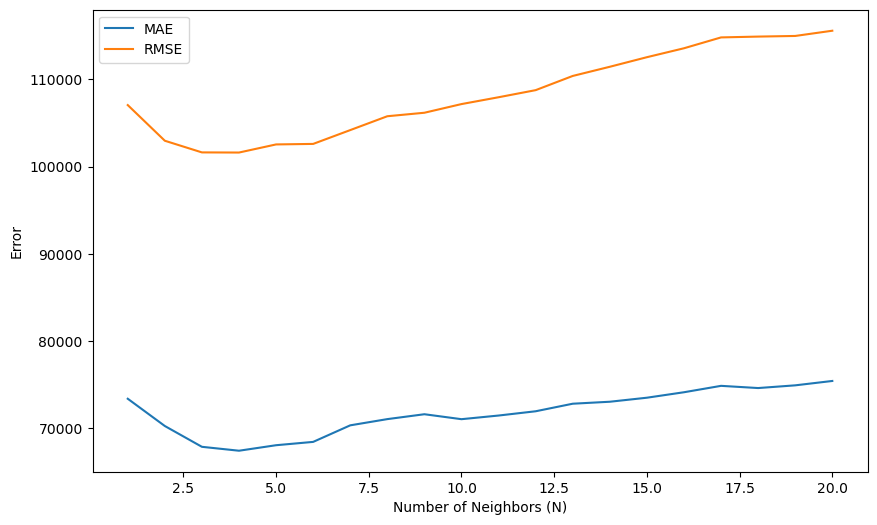

In [90]:
n_values = range(1, 21)
mae_values = []
rmse_values = []

for N in n_values:
    predictions = []
    for i in range(len(X_test)):
        pred = knn_predict(X_test.iloc[i]['latitude'], X_test.iloc[i]['longitude'], 
                           X_train['latitude'].values, X_train['longitude'].values, 
                           y_train.values, N)
        predictions.append(pred)
    mae_values.append(mean_absolute_error(y_test, predictions))
    rmse_values.append(np.sqrt(mean_squared_error(y_test, predictions)))

# Plot MAE and RMSE against N
plt.figure(figsize=(10, 6))
plt.plot(n_values, mae_values, label='MAE')
plt.plot(n_values, rmse_values, label='RMSE')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Error')
plt.legend()
plt.show()


In [94]:
# Univariate model
knn_uni = KNeighborsRegressor()
knn_uni.fit(X_train[['sq__ft']], y_train)
predictions_uni = knn_uni.predict(X_test[['sq__ft']])

# Multivariate model
knn_multi = KNeighborsRegressor()
knn_multi.fit(X_train, y_train)
predictions_multi = knn_multi.predict(X_test)

# Calculate MAE and RMSE
mae_uni = mean_absolute_error(y_test, predictions_uni)
rmse_uni = np.sqrt(mean_squared_error(y_test, predictions_uni))

mae_multi = mean_absolute_error(y_test, predictions_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, predictions_multi))

print(f"Univariate MAE: {mae_uni}, RMSE: {rmse_uni}")
print(f"Multivariate MAE: {mae_multi}, RMSE: {rmse_multi}")

Univariate MAE: 93125.71776649747, RMSE: 130110.32631487965
Multivariate MAE: 77014.52182741117, RMSE: 113782.02663265188


In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

# Calculate MAE and RMSE
mae_lr = mean_absolute_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))

print(f"Linear Regression MAE: {mae_lr}, RMSE: {rmse_lr}")

Linear Regression MAE: 101404.1324384577, RMSE: 135164.08380448655


In [98]:
print(f"Custom KNN MAE: {mae}, RMSE: {rmse}")
print(f"Univariate KNN MAE: {mae_uni}, RMSE: {rmse_uni}")
print(f"Multivariate KNN MAE: {mae_multi}, RMSE: {rmse_multi}")
print(f"Linear Regression MAE: {mae_lr}, RMSE: {rmse_lr}")

Custom KNN MAE: 68046.70456852792, RMSE: 102540.1669338406
Univariate KNN MAE: 93125.71776649747, RMSE: 130110.32631487965
Multivariate KNN MAE: 77014.52182741117, RMSE: 113782.02663265188
Linear Regression MAE: 101404.1324384577, RMSE: 135164.08380448655
